
Desafío 1: Análisis Exploratorio de Datos (EDA)

Descripción del problema:

Ha recibido un conjunto de datos que contiene información sobre las ventas de productos en una tienda durante un período de tiempo. El conjunto de datos contiene las siguientes columnas:

- Fecha: La fecha de la venta.
- Producto: El nombre del producto vendido.
- Cantidad: La cantidad de productos vendidos ese día.
- Precio Unitario: El precio unitario de cada producto.
- Total: El total de ventas para ese día.
Tu tarea es realizar un análisis exploratorio de estos datos para comprender mejor las tendencias de ventas. Algunas de las preguntas que debes responder incluyen:

¿Cuál es la cantidad total de productos vendidos durante el período de tiempo?
¿Cuál es el total de ventas durante el período de tiempo?
¿Cuál es el producto más vendido?
¿Cuál es el día con las ventas más altas?
¿Puedes identificar alguna tendencia en las ventas a lo largo del tiempo?
Asegúrate de presentar tus resultados en forma de visualizaciones y estadísticas descriptivas.
---



In [2]:
import pandas as pd
import numpy as np

# Cantidad de filas del conjunto de datos ficticios
num_filas = 100

# Datos
fechas = pd.date_range(start='2023-01-01', periods=num_filas, freq='D')
productos = np.random.choice(['Producto A', 'Producto B', 'Producto C'], num_filas)
cantidades = np.random.randint(1, 50, num_filas)
precios_unitarios = np.random.uniform(10, 100, num_filas).round(2)
total_ventas = cantidades * precios_unitarios

# Creo el DataFrame con los datos ficticios
data = {
    'Fecha': fechas,
    'Producto': productos,
    'Cantidad': cantidades,
    'Precio Unitario': precios_unitarios,
    'Total': total_ventas
}

df = pd.DataFrame(data)

#Prmeras filas del DF
print(df.head())


       Fecha    Producto  Cantidad  Precio Unitario    Total
0 2023-01-01  Producto B        19            68.15  1294.85
1 2023-01-02  Producto A        44            51.79  2278.76
2 2023-01-03  Producto B        43            90.38  3886.34
3 2023-01-04  Producto B        17            74.00  1258.00
4 2023-01-05  Producto C        23            34.69   797.87


In [3]:
df.describe()#estadisticas descriptivas

,Cantidad,Precio Unitario,Total
count,100.000000,100.000000,100.000000
mean,25.110000,53.932900,1301.715100
std,13.986931,26.586331,981.287649
min,1.000000,10.030000,22.490000
25%,13.750000,31.970000,477.397500
50%,25.000000,57.980000,1096.505000
75%,38.000000,75.167500,1937.485000
max,49.000000,99.610000,3886.340000


## ¿Cuál es la cantidad total de productos vendidos durante el período de tiempo#

In [4]:
cantidad=df['Cantidad'].sum()
print('La cantidad de productos vendidos es:', cantidad)

La cantidad de productos vendidos es: 2511


###  ¿Cuál es el total de ventas durante el período de tiempo?

In [6]:
total_ventas= df.shape
print('Total de ventas:', total_ventas[0])

Total de ventas: 100


 ¿Cuál es el producto más vendido?

In [14]:
prod = df.groupby('Producto')['Cantidad'].sum()
print(prod)   #el producto mas vendido fue el 'B'

Producto
Producto A     923
Producto B    1068
Producto C     520
Name: Cantidad, dtype: int64


###  ¿Cuál es el día con las ventas más altas?

In [15]:
max_total = df['Total'].max()
fecha_max_total = df.loc[df['Total'] == max_total, 'Fecha'].values[0]

print("Fecha en que hubo el máximo total de ventas:", fecha_max_total)



Fecha en que hubo el máximo total de ventas: 2023-01-03T00:00:00.000000000


### ¿Puedes identificar alguna tendencia en las ventas a lo largo del tiempo?

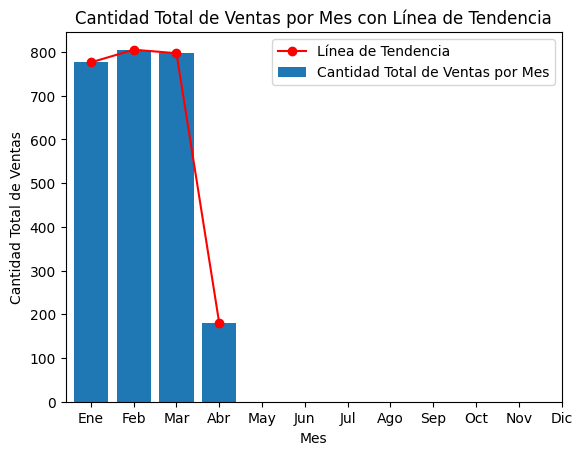

In [ ]:
import matplotlib.pyplot as plt

meses = df['Fecha'].dt.month
total_por_mes = df.groupby(meses)['Cantidad'].sum()

# Garfico de barras
plt.bar(total_por_mes.index, total_por_mes.values, label='Cantidad Total de Ventas por Mes')

# L que conecta los puntos
plt.plot(total_por_mes.index, total_por_mes.values, marker='o', color='red', label='Línea de Tendencia')

# Etiquetas de los ejes y título
plt.xlabel('Mes')
plt.ylabel('Cantidad Total de Ventas')
plt.title('Cantidad Total de Ventas por Mes con Línea de Tendencia')


plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.show()


## Sí, según la representación gráfica, se observa una tendencia decreciente en la cantidad total de ventas a lo largo del tiempo. La línea de tendencia muestra una pendiente negativa, lo que indica que las ventas están disminuyendo a medida que avanza el tiempo. Esto sugiere que hay una tendencia a la baja en las ventas a lo largo del período representado en los datos.

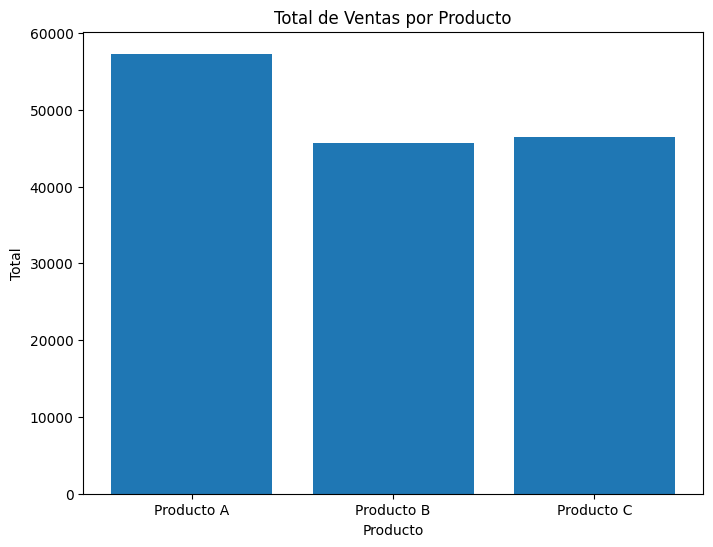

In [ ]:
producto_totales = df.groupby("Producto")["Total"].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(producto_totales["Producto"], producto_totales["Total"])
plt.title("Total de Ventas por Producto")
plt.xlabel("Producto")
plt.ylabel("Total")
plt.show()
